/opt/anaconda3/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_base.py:2923: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])
/Users/kitagawayoshifumi/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kitagawayoshifumi/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kitagawayoshifumi/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) mi

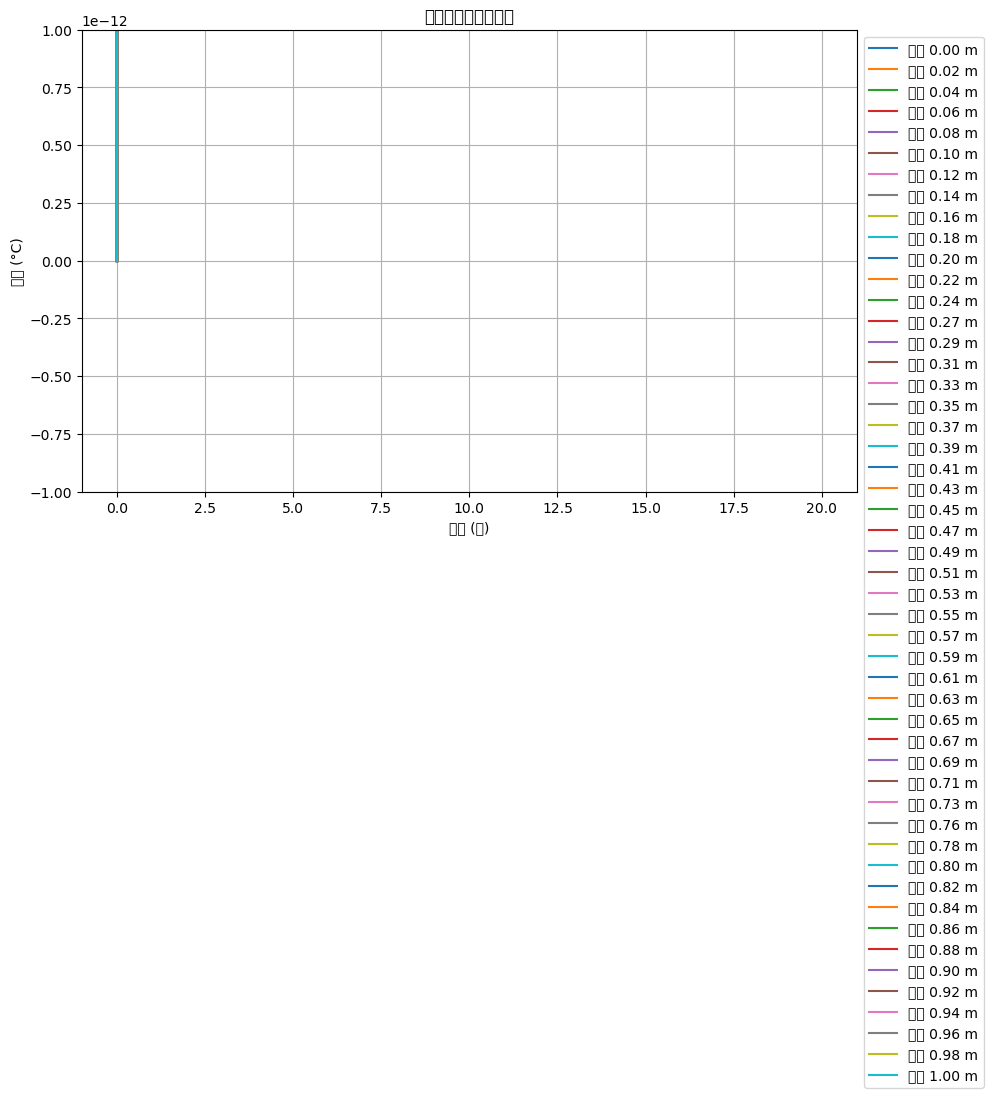

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# 定数の定義
k = 0.47  # 熱伝導率 W/mK
rho = 1573  # 密度 kg/m³
Cp = 967  # 比熱容量 J/kgK
alpha = k / (rho * Cp)  # 熱拡散率 m²/s

# シミュレーションパラメータの定義
L = 1.0  # 長さ m
Nx = 50  # 空間分割数
dx = L / (Nx - 1)  # 空間ステップ
T0 = 0  # 初期温度 ℃
T_air_initial = 0  # 初期空気温度 ℃
T_air_final = 50  # 最終空気温度 ℃
heating_rate = 5  # 温度上昇速度 ℃/分
heating_duration = 10 * 60  # 温度上昇時間 秒 (10分)
T_air_constant = T_air_final  # 加熱後の空気温度
delta_t = 5  # 時間ステップ 秒
total_time = 20 * 60  # 総シミュレーション時間 秒
time = np.arange(0, total_time + delta_t, delta_t)  # 時間配列

# 空気温度配列の生成
T_air = np.zeros_like(time, dtype=float)
for i, t in enumerate(time):
    if t < heating_duration:
        T_air[i] = T_air_initial + (heating_rate / 60) * t
    else:
        T_air[i] = T_air_constant

# 初期温度分布
T = np.ones(Nx) * T0

# 各位置での温度変化を保存する配列
temperature_history = np.zeros((len(time), Nx))

# 有限要素法の係数行列と境界条件の定義
A = diags([-alpha / dx**2, 2 * alpha / dx**2, -alpha / dx**2], [-1, 0, 1], shape=(Nx, Nx)).toarray()
A[0, 0] = A[-1, -1] = 1  # 境界条件 (Dirichlet)
A[0, 1] = A[-1, -2] = 0

# 時間積分ループ
for n in range(len(time)):
    # 右辺ベクトルの定義
    b = T.copy()
    b[0] = T_air[n]  # 境界条件 (左端)
    b[-1] = T_air[n]  # 境界条件 (右端)

    # 時間ステップの解法
    T = spsolve(A, b)

    # 各位置での温度を保存
    temperature_history[n, :] = T

# プロット
plt.figure(figsize=(10, 6))
for i in range(Nx):
    plt.plot(time / 60, temperature_history[:, i], label=f'位置 {i * dx:.2f} m')

plt.xlabel('時間 (分)')
plt.ylabel('温度 (°C)')
plt.title('各位置での温度変化')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

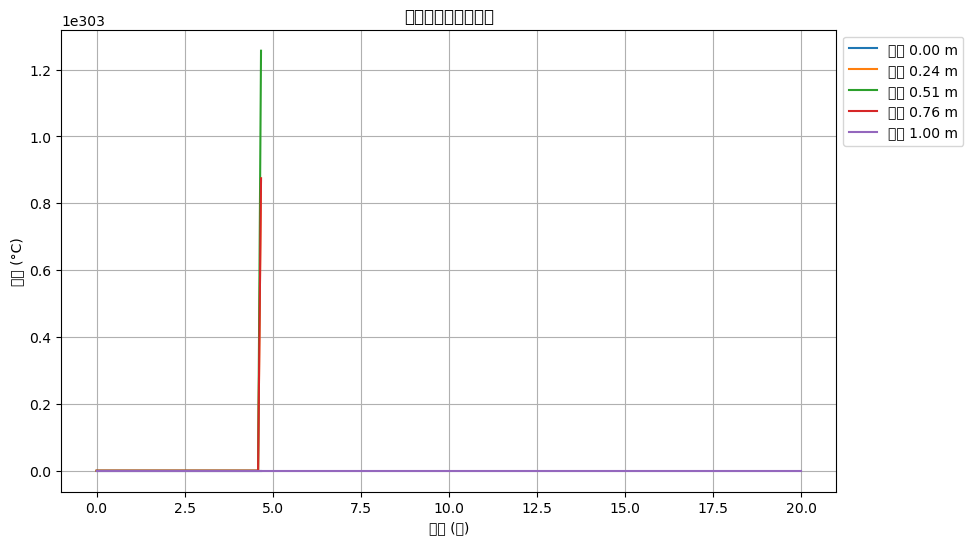

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# 定数の定義
k = 0.47  # 熱伝導率 W/mK
rho = 1573  # 密度 kg/m³
Cp = 967  # 比熱容量 J/kgK
alpha = k / (rho * Cp)  # 熱拡散率 m²/s

# シミュレーションパラメータの定義
L = 1.0  # 長さ m
Nx = 50  # 空間分割数
dx = L / (Nx - 1)  # 空間ステップ
T0 = 0  # 初期温度 ℃
T_air_initial = 0  # 初期空気温度 ℃
T_air_final = 50  # 最終空気温度 ℃
heating_rate = 5  # 温度上昇速度 ℃/分
heating_duration = 10 * 60  # 温度上昇時間 秒 (10分)
T_air_constant = T_air_final  # 加熱後の空気温度
delta_t = 5  # 時間ステップ 秒
total_time = 20 * 60  # 総シミュレーション時間 秒
time = np.arange(0, total_time + delta_t, delta_t)  # 時間配列

# 空気温度配列の生成
T_air = np.zeros_like(time, dtype=float)
for i, t in enumerate(time):
    if t < heating_duration:
        T_air[i] = T_air_initial + (heating_rate / 60) * t
    else:
        T_air[i] = T_air_constant

# 初期温度分布
T = np.ones(Nx) * T0

# 各位置での温度変化を保存する配列
temperature_history = np.zeros((len(time), Nx))

# 有限要素法の係数行列と境界条件の定義
A = diags([-alpha / dx**2, 2 * alpha / dx**2, -alpha / dx**2], [-1, 0, 1], shape=(Nx, Nx)).toarray()
A[0, 0] = A[-1, -1] = 1  # 境界条件 (Dirichlet)
A[0, 1] = A[-1, -2] = 0

# 時間積分ループ
for n in range(len(time)):
    # 右辺ベクトルの定義
    b = T.copy()
    b[0] = T_air[n]  # 境界条件 (左端)
    b[-1] = T_air[n]  # 境界条件 (右端)

    # 時間ステップの解法
    T = spsolve(A, b)

    # 各位置での温度を保存
    temperature_history[n, :] = T

# プロット
plt.figure(figsize=(10, 6))
selected_positions = [0, Nx//4, Nx//2, 3*Nx//4, Nx-1]  # 代表的な位置
for i in selected_positions:
    plt.plot(time / 60, temperature_history[:, i], label=f'位置 {i * dx:.2f} m')

plt.xlabel('時間 (分)')
plt.ylabel('温度 (°C)')
plt.title('各位置での温度変化')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

/Users/kitagawayoshifumi/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kitagawayoshifumi/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kitagawayoshifumi/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kitagawayoshifumi/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kitagawayoshifumi/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEO

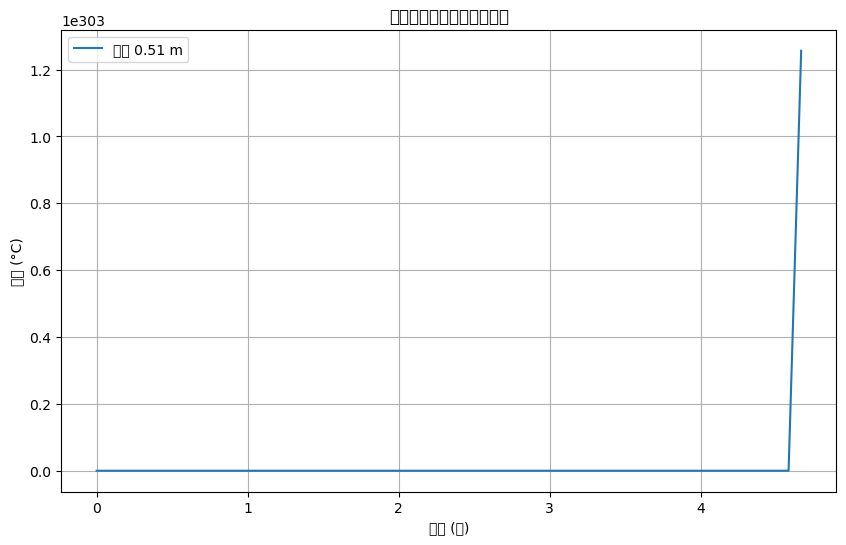

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# 定数の定義
k = 0.47  # 熱伝導率 W/mK
rho = 1573  # 密度 kg/m³
Cp = 967  # 比熱容量 J/kgK
alpha = k / (rho * Cp)  # 熱拡散率 m²/s

# シミュレーションパラメータの定義
L = 1.0  # 長さ m
Nx = 50  # 空間分割数
dx = L / (Nx - 1)  # 空間ステップ
T0 = 0  # 初期温度 ℃
T_air_initial = 0  # 初期空気温度 ℃
T_air_final = 50  # 最終空気温度 ℃
heating_rate = 5  # 温度上昇速度 ℃/分
heating_duration = 10 * 60  # 温度上昇時間 秒 (10分)
T_air_constant = T_air_final  # 加熱後の空気温度
delta_t = 5  # 時間ステップ 秒
total_time = 20 * 60  # 総シミュレーション時間 秒
time = np.arange(0, total_time + delta_t, delta_t)  # 時間配列

# 空気温度配列の生成
T_air = np.zeros_like(time, dtype=float)
for i, t in enumerate(time):
    if t < heating_duration:
        T_air[i] = T_air_initial + (heating_rate / 60) * t
    else:
        T_air[i] = T_air_constant

# 初期温度分布
T = np.ones(Nx) * T0

# 各位置での温度変化を保存する配列
temperature_history = np.zeros((len(time), Nx))

# 有限要素法の係数行列と境界条件の定義
A = diags([-alpha / dx**2, 2 * alpha / dx**2, -alpha / dx**2], [-1, 0, 1], shape=(Nx, Nx)).toarray()
A[0, 0] = A[-1, -1] = 1  # 境界条件 (Dirichlet)
A[0, 1] = A[-1, -2] = 0

# 時間積分ループ
for n in range(len(time)):
    # 右辺ベクトルの定義
    b = T.copy()
    b[0] = T_air[n]  # 境界条件 (左端)
    b[-1] = T_air[n]  # 境界条件 (右端)

    # 時間ステップの解法
    T = spsolve(A, b)

    # 各位置での温度を保存
    temperature_history[n, :] = T

# 中間点のインデックス
mid_index = Nx // 2

# 中間点の温度変化をプロット
plt.figure(figsize=(10, 6))
plt.plot(time / 60, temperature_history[:, mid_index], label=f'位置 {mid_index * dx:.2f} m')

plt.xlabel('時間 (分)')
plt.ylabel('温度 (°C)')
plt.title('ロッド中間点での温度変化')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

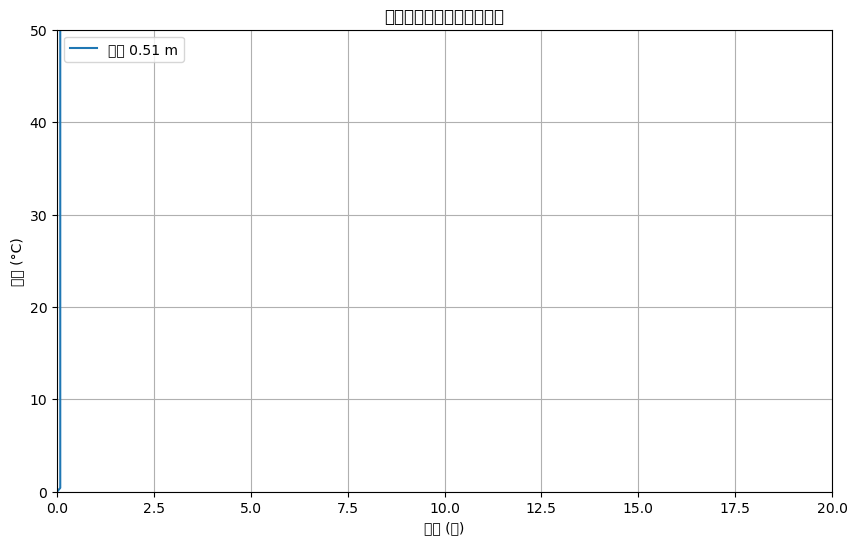

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# 定数の定義
k = 0.47  # 熱伝導率 W/mK
rho = 1573  # 密度 kg/m³
Cp = 967  # 比熱容量 J/kgK
alpha = k / (rho * Cp)  # 熱拡散率 m²/s

# シミュレーションパラメータの定義
L = 1.0  # 長さ m
Nx = 50  # 空間分割数
dx = L / (Nx - 1)  # 空間ステップ
T0 = 0  # 初期温度 ℃
T_air_initial = 0  # 初期空気温度 ℃
T_air_final = 50  # 最終空気温度 ℃
heating_rate = 5  # 温度上昇速度 ℃/分
heating_duration = 10 * 60  # 温度上昇時間 秒 (10分)
T_air_constant = T_air_final  # 加熱後の空気温度
delta_t = 5  # 時間ステップ 秒
total_time = 20 * 60  # 総シミュレーション時間 秒
time = np.arange(0, total_time + delta_t, delta_t)  # 時間配列

# 空気温度配列の生成
T_air = np.zeros_like(time, dtype=float)
for i, t in enumerate(time):
    if t < heating_duration:
        T_air[i] = T_air_initial + (heating_rate / 60) * t
    else:
        T_air[i] = T_air_constant

# 初期温度分布
T = np.ones(Nx) * T0

# 各位置での温度変化を保存する配列
temperature_history = np.zeros((len(time), Nx))

# 有限要素法の係数行列と境界条件の定義
A = diags([-alpha / dx**2, 2 * alpha / dx**2, -alpha / dx**2], [-1, 0, 1], shape=(Nx, Nx)).toarray()
A[0, 0] = A[-1, -1] = 1  # 境界条件 (Dirichlet)
A[0, 1] = A[-1, -2] = 0

# 時間積分ループ
for n in range(len(time)):
    # 右辺ベクトルの定義
    b = T.copy()
    b[0] = T_air[n]  # 境界条件 (左端)
    b[-1] = T_air[n]  # 境界条件 (右端)

    # 時間ステップの解法
    T = spsolve(A, b)

    # 各位置での温度を保存
    temperature_history[n, :] = T

# 中間点のインデックス
mid_index = Nx // 2

# 中間点の温度変化をプロット
plt.figure(figsize=(10, 6))
plt.plot(time / 60, temperature_history[:, mid_index], label=f'位置 {mid_index * dx:.2f} m')

plt.xlabel('時間 (分)')
plt.ylabel('温度 (°C)')
plt.title('ロッド中間点での温度変化')
plt.legend(loc='upper left')
plt.grid(True)
plt.xlim(0, 20)  # 横軸の範囲を0分〜20分に設定
plt.ylim(0, 50)  # 縦軸の範囲を0℃〜50℃に設定
plt.show()